In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
@njit(parallel = True)
def compute(t, l):
    """
    Считает эергию для заданных l и t
    
    Параметры
    ----------
    E (float) - сумма произведений соседних спинов на константы взаимодействия для одной комбинации спинов
    sum_z (масиив numpy) - статистическая сумма
    sum_e (массив numpy) - статистическая сумма, умноженная на E
    chain (массив numpy) - одна комбинация цепочки спинов
    ind (int) - число, которе мы преобразуем из десятичной системы в двоичную, чтобы перебрать все возможные варианты комбинации спинов
    k (int) - счётчик
    Z_sigma (float) - один элемент статистической суммы
    
    Возвращаемое занчение
    ----------
    1 / sum_z.sum() * sum_e.sum() (float) - средняя энергия системы для заданных l и t
    """
    sum_e = np.zeros(2 ** l, dtype=np.float64)
    sum_z = np.zeros(2 ** l, dtype=np.float64)
    for i in prange(2 ** l):
        ind = 0+i
        chain = np.zeros(l, dtype=np.float64)
        k = 0
        while ind:
            chain[k] = ind % 2
            ind //= 2
            k += 1
        chain = chain[::-1] * 2 - np.ones(l, dtype=np.float64)
        E = -((chain[:-1].copy().reshape((1, l - 1)) @ chain[1:].copy().reshape((l - 1, 1))).flatten()[0] + chain[0] * chain[-1])
        Z_sigma = np.exp(-E / t)
        sum_z[i] = Z_sigma
        sum_e[i] = E * Z_sigma
    return 1 / sum_z.sum() * sum_e.sum()

In [3]:
def find_energy():
    """
    Засекает время, требуемое на подсчёт энергии молекул при заданной длине цепочки l
    
    Параметры
    ----------
    L (список python) - глобальная переменная , хранит все возможные длины цепочек
    l (int) - длина цепочки в данный момент
    T (список python) - глобальная переменная , хранит все возможные значения температур
    t (float) - температура в данный момент
    total (список python) - полученные значения энергии для заданных l и t
    all (список python) - полученные значения энергии для всех l и t
    
    Возращаемое занчение
    ----------
    all (список python)
    """
    all = []
    for l in L:
        start_t = time.time()
        total = []
        for t in T:
            total.append(compute(t, l))
        total = [i/l for i in total]
        print("Length: {}, time: {} seconds".format(l, round(time.time() - start_t, 4)))
        all.append([total])
    return all

In [4]:
T = [1 + i/10 for i in range(41)]
L = [i for i in range(2, 32)]
all = find_energy()

Length: 2, time: 4.801 seconds
Length: 3, time: 0.0867 seconds
Length: 4, time: 0.0746 seconds
Length: 5, time: 0.0878 seconds
Length: 6, time: 0.0671 seconds
Length: 7, time: 0.0908 seconds
Length: 8, time: 0.0741 seconds
Length: 9, time: 0.0873 seconds
Length: 10, time: 0.0958 seconds
Length: 11, time: 0.1342 seconds
Length: 12, time: 0.1705 seconds
Length: 13, time: 0.3336 seconds
Length: 14, time: 0.7117 seconds
Length: 15, time: 1.2498 seconds
Length: 16, time: 2.201 seconds
Length: 17, time: 4.3847 seconds
Length: 18, time: 8.4202 seconds
Length: 19, time: 15.9548 seconds
Length: 20, time: 30.2026 seconds
Length: 21, time: 60.0985 seconds
Length: 22, time: 120.3271 seconds
Length: 23, time: 238.5302 seconds
Length: 24, time: 478.0675 seconds
Length: 25, time: 955.7242 seconds
Length: 26, time: 1900.9416 seconds
Length: 27, time: 3776.7231 seconds
Length: 28, time: 7706.8818 seconds
Length: 29, time: 15479.7155 seconds
Length: 30, time: 31036.1704 seconds
Length: 31, time: 61181.4

In [28]:
print(np.array(all).squeeze().tolist())

[[-0.964027580075817, -0.9486568273003458, -0.9311096086675777, -0.9118614885467308, -0.8913734677347187, -0.8700616617426719, -0.848283639957513, -0.8263354483414422, -0.8044548002984013, -0.782827356819079, -0.761594155955765, -0.740859061200588, -0.7206956331664799, -0.7011531616867722, -0.6822617902381698, -0.664036770267849, -0.6464819337624413, -0.6295924909105016, -0.6133572603953826, -0.5977604315348503, -0.5827829453479101, -0.568403568587465, -0.5545997223493823, -0.5413481157551437, -0.5286252256434942, -0.5164076551851798, -0.5046723977218569, -0.4933970267452253, -0.4825598285864788, -0.4721398909018262, -0.46211715726000985, -0.4524724559281345, -0.4431875092007125, -0.4342449282316198, -0.42562819723499473, -0.4173216500588711, -0.4093104414564388, -0.40158051484592966, -0.39411856793081457, -0.38691201722312535, -0.37994896225522484], [-0.9305533251033542, -0.9023284232344149, -0.8710992410614766, -0.8380013012579526, -0.8040340383279077, -0.770008090073785, -0.73653867

In [12]:
all = np.array(all).squeeze().T

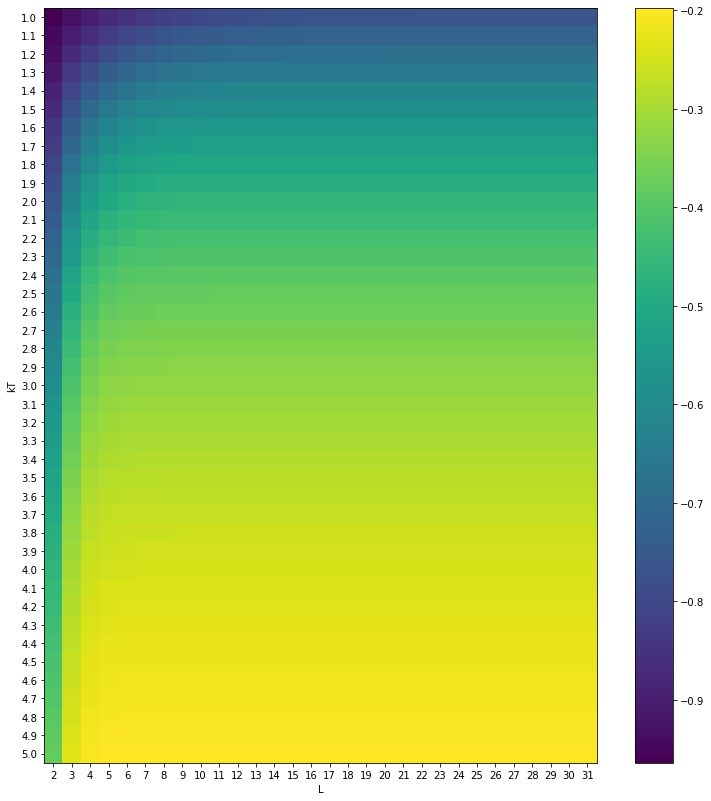

In [25]:
px = 1/plt.rcParams['figure.dpi']
fig, ax = plt.subplots(1, 1, figsize=(1000*px, 1000*px))
img = ax.imshow(all)
y_label_list = [1 + i/10 for i in range(41)]
x_label_list = [i for i in range(2, 32)]
plt.xlabel('L')
plt.ylabel('kT')
ax.set_xticks([i for i in range(30)])
ax.set_xticklabels(x_label_list)
ax.set_yticks([i for i in range(41)])
ax.set_yticklabels(y_label_list)
fig.colorbar(img)
plt.show()